In [155]:
#importing the required library here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
#load the train file
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [157]:
# predicted label is Survived ; 1- survived and 0- died
# Name column does not seems to provide any information.
# Let's take a look at train_data

train_data.info()
print('*'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [158]:
# Age contains some null values
# Cabin column also contains null values but the question is whether it is a good column to take in account for prediction.
# we will see the percentage of the missing value for each column

mis_val = (train_data.isnull().sum()*100)/(len(train_data))
mis_val_test = (test_data.isnull().sum()*100)/(len(test_data))
print(mis_val)
print('*'*25)
print(mis_val_test)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
*************************
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [159]:
# We are going to define the function that build graphs for different parameter with Survived column (Primary column)

def Column_with_Survived(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=False, figsize = (10,5))

In [160]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

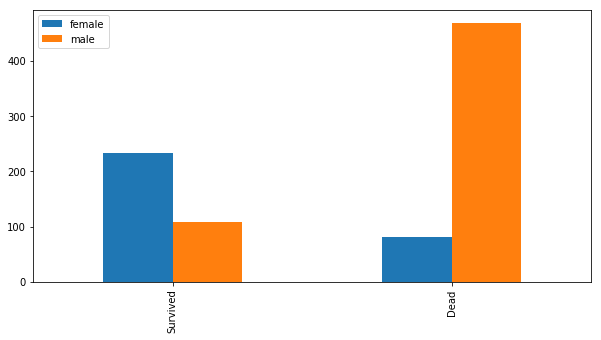

In [161]:
# let's test out our code with different columns/features

Column_with_Survived('Sex')

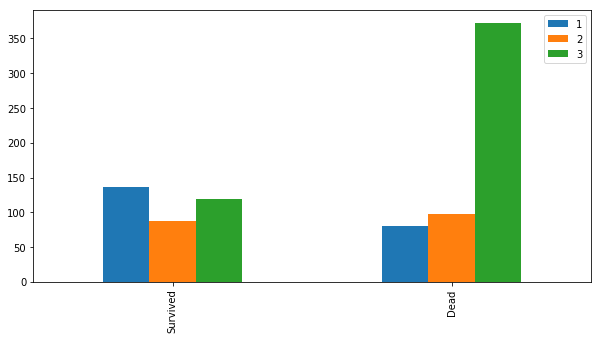

In [162]:
Column_with_Survived('Pclass')

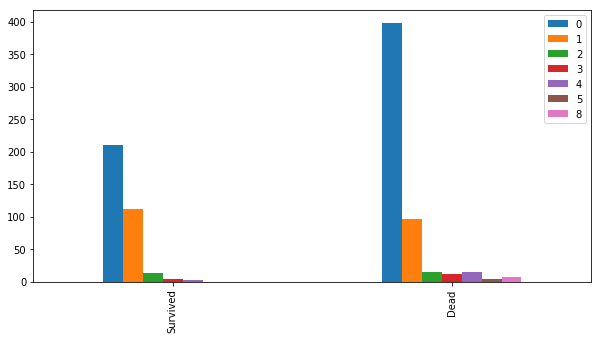

In [163]:
Column_with_Survived('SibSp')

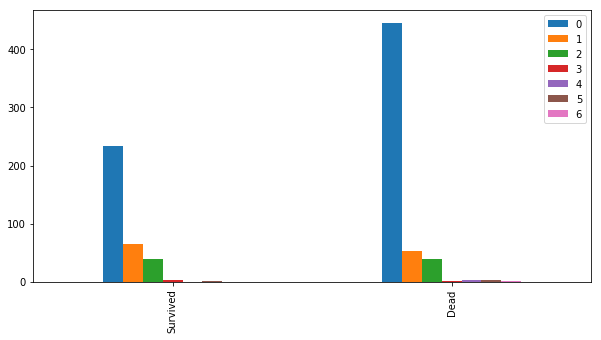

In [164]:
Column_with_Survived('Parch')

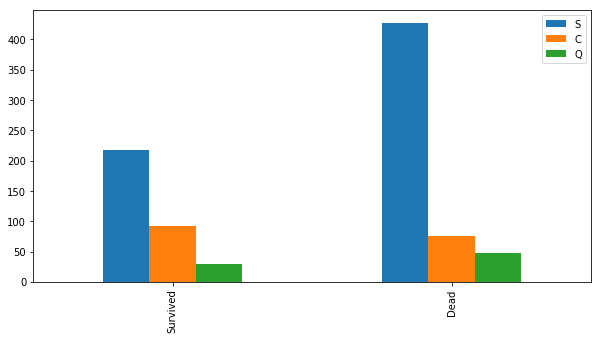

In [165]:
Column_with_Survived('Embarked')

In [166]:
# Lets start feature engineering

# Name column doesn't add much information to it. We are going to drop.
train_data.drop(labels=['Name'], axis = 1, inplace=True)
test_data.drop(labels=['Name'], axis = 1, inplace=True)

In [167]:
# Combine the data
train_test_data =  [train_data, test_data]

In [168]:
# assigning the value 1 to male and 0 to female.
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({"male": 1, "female": 0})

In [169]:
train_data['Age'].fillna((train_data['Age'].mean()), inplace = True)
test_data['Age'].fillna((test_data['Age'].mean()), inplace = True)

In [170]:
# New Concept
# Seaborn FacetGrid
import seaborn as sns

D:\Install Software\Anaconda For Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


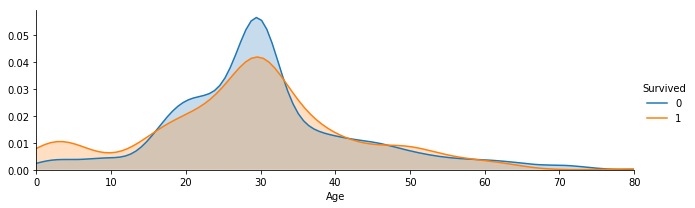

In [171]:
facet = sns.FacetGrid(train_data, aspect=3, hue='Survived')
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim = (0, train_data['Age'].max()))
facet.add_legend()
plt.show()
plt.xlim= (10,50)

In [172]:
# We are going to set Age Column as categorical data because that'w what our algorithm needed.
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    

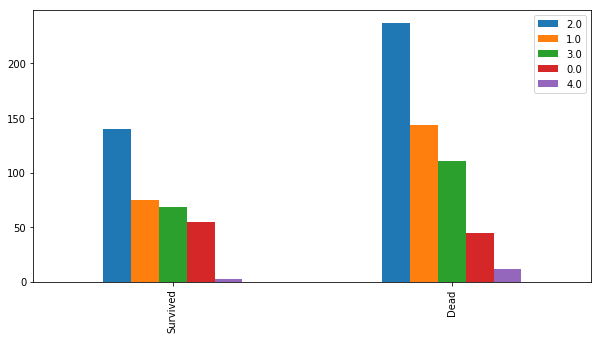

In [173]:
Column_with_Survived('Age')

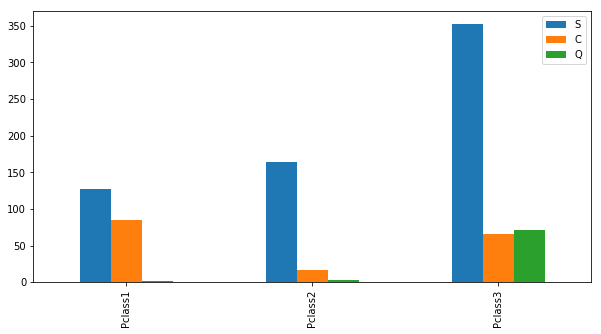

In [174]:
# There are two columns with the Embarked Column as empty. We can see if we can fill with any suitable value or we have to ignore it.
PClass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
PClass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
PClass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([PClass1,PClass2,PClass3])
df.index = ['Pclass1','Pclass2', 'Pclass3']
df.plot(kind='bar',stacked=False, figsize=(10,5))
plt.show()

In [175]:
# As the number of Passenger borading from S Embark, so we are going to fill the missing records with 'S' Embarkment.
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [176]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({"Q":2, "C":1, "S":0})

In [177]:
train_data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)

D:\Install Software\Anaconda For Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


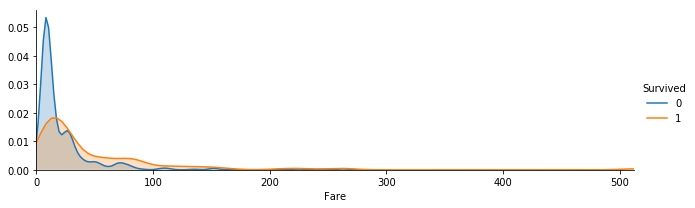

In [178]:
facet2 = sns.FacetGrid( train_data,aspect=3, hue='Survived')
facet2.map(sns.kdeplot,'Fare',shade=True)
facet2.set(xlim = (0, train_data['Fare'].max()))
facet2.add_legend()
plt.show()
plt.xlim = (0,20)

In [179]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare']=1,
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare']>100, 'Fare']=3

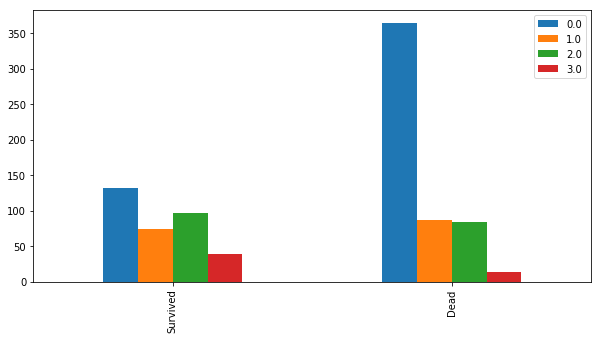

In [180]:
Column_with_Survived('Fare')

In [181]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [182]:
train_data.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    1  1.0      1      0         A/5 21171   
1            2         1       1    0  3.0      1      0          PC 17599   
2            3         1       3    0  1.0      0      0  STON/O2. 3101282   
3            4         1       1    0  2.0      1      0            113803   
4            5         0       3    1  2.0      0      0            373450   

   Fare Cabin  Embarked  
0   0.0   NaN         0  
1   2.0     C         1  
2   0.0   NaN         0  
3   2.0     C         0  
4   0.0   NaN         0

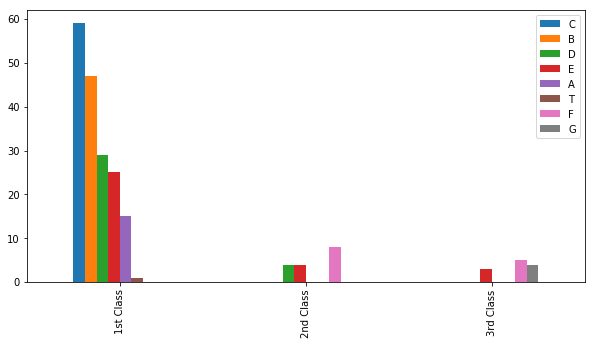

In [183]:
Pclass_1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass_2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass_3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass_1,Pclass_2,Pclass_3])
df.index = (['1st Class','2nd Class','3rd Class'])
df.plot(kind='bar', stacked=False, figsize=(10,5))

In [184]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [185]:
train_data['Cabin'].fillna(train_data.groupby('Pclass')['Cabin'].transform('median') ,inplace=True)
test_data['Cabin'].fillna(test_data.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [186]:
train_data.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    1  1.0      1      0         A/5 21171   
1            2         1       1    0  3.0      1      0          PC 17599   
2            3         1       3    0  1.0      0      0  STON/O2. 3101282   
3            4         1       1    0  2.0      1      0            113803   
4            5         0       3    1  2.0      0      0            373450   

   Fare  Cabin  Embarked  
0   0.0    2.0         0  
1   2.0    0.8         1  
2   0.0    2.0         0  
3   2.0    0.8         0  
4   0.0    2.0         0

In [187]:
test_data.head()

PassengerId  Pclass  Sex  Age  SibSp  Parch   Ticket  Fare  Cabin  Embarked
0          892       3    1  2.0      0      0   330911   0.0    2.0         2
1          893       3    0  3.0      1      0   363272   0.0    2.0         0
2          894       2    1  3.0      0      0   240276   0.0    2.0         2
3          895       3    1  2.0      0      0   315154   0.0    2.0         0
4          896       3    0  1.0      1      1  3101298   0.0    2.0         0

In [188]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = train_data['SibSp'] + test_data['Parch'] + 1

D:\Install Software\Anaconda For Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


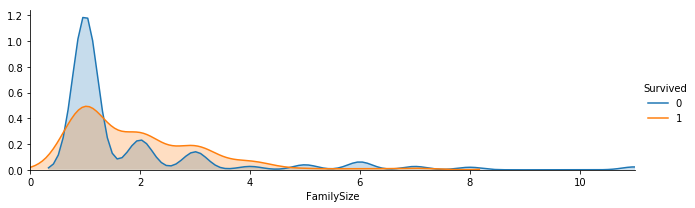

In [189]:
facet3 = sns.FacetGrid(train_data, aspect=3, hue='Survived')
facet3.map(sns.kdeplot, 'FamilySize',shade=True)
facet3.set(xlim = (0, train_data['FamilySize'].max()))
facet3.add_legend()

In [190]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [191]:
# sanity check
mis_val = (train_data.isnull().sum()*100)/(len(train_data))
print(mis_val)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
FamilySize     0.0
dtype: float64


In [192]:
# Since the highest row number reaches to 680 out of 889, it is not going to fit in catergorical column.
train_data = train_data.drop(labels=['Ticket','SibSp','Parch'], axis=1)
test_data = test_data.drop(labels=['Ticket','SibSp','Parch'],axis=1)
train_data = train_data.drop(['PassengerId'],axis=1)

In [195]:
train_data_new = train_data.drop('Survived',axis=1)
target = train_data['Survived']
train_data_new.shape, target.shape

((891, 7), (891,))

In [197]:
# For better result we are going to use Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [200]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [201]:
# We thought it is better to use Decision Tree in first place.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [203]:
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),
       AdaBoostClassifier(),ExtraTreesClassifier()]

In [205]:
# We are going to define the function which set the cross validation for different algo. mentioned above.
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data_new, target, n_jobs=1, cv=k_fold,scoring=scoring)
        print("Score of model ",i,":",round(np.mean(score)*100,2))

In [206]:
model_fit()

Score of model  0 : 80.47
Score of model  1 : 81.03
Score of model  2 : 81.26
Score of model  3 : 76.76
Score of model  4 : 81.26
Score of model  5 : 80.13
Score of model  6 : 81.59
Score of model  7 : 79.91
Score of model  8 : 80.58


In [207]:
test_data['Survived']= ""

In [208]:
test_data.head()

PassengerId  Pclass  Sex  Age  Fare  Cabin  Embarked  FamilySize Survived
0          892       3    1  2.0   0.0    2.0         2         0.4         
1          893       3    0  3.0   0.0    2.0         0         0.4         
2          894       2    1  3.0   0.0    2.0         2         0.0         
3          895       3    1  2.0   0.0    2.0         0         0.4         
4          896       3    0  1.0   0.0    2.0         0         0.4

In [210]:
clf1 = SVC()
clf1.fit(train_data_new, target)
test_data
test_data_new = test_data.drop(['Survived','PassengerId'], axis=1)
prediction = clf1.predict(test_data_new)

In [213]:
test_data_new['Survived'] = prediction
submission = pd.DataFrame(test_data['PassengerId'],test_data_new['Survived'])
submission.to_csv("Submission2.csv")

In [212]:
test_data['PassengerId']

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64